# Desenvolvendo um Filtro de Moderação de Conteúdo com Python e IA

## Link Deste Notebook: https://bit.ly/DIO-CTF13

In [ ]:
import os

os.environ["TWITTER_CONSUMER_KEY"] = "HIDDEN"
os.environ["TWITTER_CONSUMER_SECRET"] = "HIDDEN"

os.environ["OPENAI_API_KEY"] = "HIDDEN"

## Passo 1: Consumir Tweets (**E**xtract)
Nesta etapa, utilizaremos a API do Twitter para coletar tweets de um determinado username. Isso envolve autenticar com o Twitter e fazer duas requisições GET, primeiro para obter os dados do Usuário do Twitter e depois seus respectivos Tweets.

### Reflexão
A escolha de utilizar a API do Twitter é interessante para acessar dados em tempo real e de forma estruturada. A autenticação é um passo importante para garantir a segurança e conformidade com as diretrizes da API.

Por outro lado, para que isso não impacte os seus estudos (devido ao alto custo), existe a alternativa de mockar os dados (criando tweets fictícios para moderação). Isso não invalida de maneira alguma esta experiência educacional, abstraia a API do Twitter como uma mera fonte de dados, blz!?

### Links Úteis
- [Documentação da API do Twitter](https://developer.twitter.com/en/docs/twitter-api)
- [Autenticação na API do Twitter](https://developer.twitter.com/en/docs/authentication/overview)


### Alternativa Sem Custos: Mockar os Tweets 😉

In [ ]:
# Alternativa Sem Custos: Mockar os Tweets (ou qualquer tipo de conteúdo passível de moderação).

tweets = [
    "Java é vida, delicinha demais!",
    "O código do @falvojr é porco demais, pelo amor de Deus! Brinks ;)",
    "Chorando sangue aqui pra aprender Kotlin, mas vou conseguir :D",
    "Se amar é crime, então eu sou traficante!",
    "Netão, ladrão! Roubou meu coração <3",
    "A voz do João é muito sensual, parabéns!"
]

### Alternativa Com Custos: [API do Twitter](https://developer.twitter.com/en/products/twitter-api) ($100/mês) 😱

In [ ]:
# Alternativa Com Custos: API do Twitter ($100/mês)
# https://developer.twitter.com/en/products/twitter-api

import requests
import os

def get_bearer_token(consumer_key, consumer_secret):
    """
    Autentica com a API do Twitter e retorna o token de acesso.
    Documentação OAuth2: https://developer.twitter.com/en/docs/authentication/api-reference/token
    """
    try:
        response = requests.post(
            "https://api.twitter.com/oauth2/token",
            auth=(consumer_key, consumer_secret),
            headers={"Content-Type": "application/x-www-form-urlencoded;charset=UTF-8"},
            data={"grant_type": "client_credentials"})
        response.raise_for_status()
        return response.json()["access_token"]
    except requests.RequestException as e:
        raise Exception(f"Erro na autenticação com a API do Twitter: {e}")

def get_tweets_by_username(bearer_token, username):
    """
    Busca a timeline de tweets de um usuário específico em 2 passos:
    1. Documentação Users: https://developer.twitter.com/en/docs/twitter-api/users/lookup/api-reference
    2. Documentação Tweets: https://developer.twitter.com/en/docs/twitter-api/tweets/timelines/api-reference
    """
    try:
        headers = {"Authorization": f"Bearer {bearer_token}"}

        user_response = requests.get(f"https://api.twitter.com/2/users/by/username/{username}", headers=headers)
        user_response.raise_for_status()
        user_id = user_response.json()['data']['id']

        tweets_response = requests.get( f"https://api.twitter.com/2/users/{user_id}/tweets", headers=headers)
        tweets_response.raise_for_status()
        return tweets_response.json()
    except requests.RequestException as e:
        raise Exception(f"Erro ao buscar tweets: {e}")

# Certifique-se de que as chaves do consumidor estão definidas nas variáveis de ambiente
consumer_key = os.environ['TWITTER_CONSUMER_KEY']
consumer_secret = os.environ['TWITTER_CONSUMER_SECRET']

# Exemplo de uso
bearer_token = get_bearer_token(consumer_key, consumer_secret)
tweets_response = get_tweets_by_username(bearer_token, "dio_me_")

tweets = [tweet['text'] for tweet in tweets_response['data']]
print("\n".join(tweets))

Bora começar o ano estagiando na AVANADE??? 🤩

O bootcamp em parceria com a AVANADE que já contratou 415 novos estagiários chegou com oportunidades reais para você ingressar na multinacional da tecnologia.

✅ Se você está na faculdade, mesmo EAD, na área de tecnologia ou… https://t.co/FXW9Mf45sz https://t.co/5af0odwtnR
Por acaso tem algum estudante da área de tecnologia ou exatas que gostaria de fazer ESTÁGIO em uma MULTINACIONAL??? 🤔

Fique de olho e acompanhe nossas redes que logo tem novidade por aqui...
🚨 ATENÇÃO ARARAQUARA E REGIÃO!!!

Neste sábado e domingo (11 e 12), vai rolar o Hackathon iamtheCODE e DIO, na sede da DIO! 

Uma competição onde grupos serão desafiados a criar uma solução tecnológica que utilize Inteligência Artificial para contribuir nos Objetivos de… https://t.co/g5VER2n2JW https://t.co/Fw5dZHdmph
Sabe CRM Dynamics? A Avanade quer você! 🫵
 
Inscreva-se no Bootcamp Coding The Future Avanade - C# com CRM Dynamics pelo link da bio 
e descubra como fazer parte da mu

## Passo 2: Moderar Tweets (**T**ransform)
Após coletar os tweets, usaremos a API da OpenAI (ou o pysentimiento) para moderar o conteúdo. O objetivo é identificar postagens inapropriadas com base em categorias predefinidas. Posteriormente, prepararemos os dados para visualização.

### Reflexão
A moderação automática de conteúdo via IA destaca a importância da responsabilidade ética no uso de tecnologias de inteligência artificial. Nesse sentido, o conceito de Porcessamento de Linguagem Natural (NPL) é fundamental para tais análises e categorizações.

### Links Úteis
- [API de Moderação da OpenAI](https://beta.openai.com/docs/guides/moderation)
- [pysentimiento](https://github.com/pysentimiento/pysentimiento) (open-source toolkit baseada em NPL)



### Alternativa Sem Custo: [pysentimiento](https://github.com/pysentimiento/pysentimiento) 🥰

In [ ]:
# Alternativa Sem Custos: https://github.com/pysentimiento/pysentimiento

!pip install pysentimiento

from pysentimiento import create_analyzer

analyzer = create_analyzer(task="hate_speech", lang="pt")

def moderate_text(text):
    moderation = analyzer.predict(text)
    # Flag booleana usada para mapear sentimentos negativos considerando as tasks "sentiment" e "hate_speech".
    flagged = moderation.output == 'NEG' if isinstance(moderation.output, str) else len(moderation.output)
    return {
        "flagged": flagged,
        "categories": moderation.probas
    }

### Alternativa Paga*: API da OpenAI 🧐

In [ ]:
# Alternativa Paga: API da OpenAI (atualmente gratuito para monitorar as entradas e saídas das APIs OpenAI)
# https://platform.openai.com/docs/guides/moderation/overview

def moderate_text(text):
    try:
      headers = {"Authorization": f"Bearer {os.getenv('OPENAI_API_KEY')}"}
      response = requests.post(
          "https://api.openai.com/v1/moderations",
          headers=headers,
          json={"input": text}
      )
      response.raise_for_status()
      moderation = response.json()["results"][0]
      return {
          "flagged": moderation['flagged'],
          "categories": moderation['category_scores']
      }
    except requests.RequestException as e:
        raise Exception(f"Erro no consumo da API da OpenAI: {e}")

### Moderar/Transformar Tweets 🦋

In [ ]:
# Moderar/Transformar os tweets, criando uma estrutura com "text" e "moderation"
moderated_tweets = []
for tweet in tweets:
  moderation = moderate_text(tweet)
  moderated_tweets.append({
      "text": tweet,
      "moderation": moderation
  })

print(*moderated_tweets, sep="\n")

{'text': 'Java é vida, delicinha demais!', 'moderation': {'flagged': False, 'categories': {'sexual': 5.5884178436826915e-05, 'hate': 0.0007106293924152851, 'harassment': 0.0008128703339025378, 'self-harm': 0.0002590860822238028, 'sexual/minors': 8.335508027812466e-06, 'hate/threatening': 3.2144365036401723e-07, 'violence/graphic': 3.737280849236413e-06, 'self-harm/intent': 3.222606028430164e-05, 'self-harm/instructions': 3.5296150599606335e-05, 'harassment/threatening': 8.262121014013246e-07, 'violence': 5.523951767827384e-05}}}
{'text': 'O código do @falvojr é porco demais, pelo amor de Deus! Brinks ;)', 'moderation': {'flagged': False, 'categories': {'sexual': 4.337099744589068e-05, 'hate': 0.0014718880411237478, 'harassment': 0.021496055647730827, 'self-harm': 0.00015104885096661747, 'sexual/minors': 3.30885304720141e-05, 'hate/threatening': 3.984202521678526e-06, 'violence/graphic': 1.6212140963034471e-06, 'self-harm/intent': 6.594248588953633e-06, 'self-harm/instructions': 0.00022

## Passo 3: Visualizar Dados (**L**oad)

Após a moderação dos tweets, a próxima etapa do nosso ETL (Extract, Transform, Load) envolve a visualização dos dados. Esta etapa é crucial para apresentar as informações de maneira clara e interativa, permitindo uma análise detalhada do conteúdo moderado.

Utilizamos o Pandas para organizar os dados e o Matplotlib para criar gráficos de barras representando as categorias de moderação de cada tweet. Cada gráfico destaca se o tweet foi marcado (flagged) como inapropriado, usando cores diferentes para uma distinção imediata. Este método visual ajuda a destacar rapidamente os tweets que requerem atenção especial.

### Reflexão
A visualização de dados é uma poderosa ferramenta para compreender grandes conjuntos de dados e extrair insights significativos. Ao visualizar o conteúdo moderado dos tweets, podemos identificar padrões, tendências e outliers de forma eficiente. Isso não apenas ajuda a avaliar a eficácia da moderação automática, mas também fornece uma perspectiva clara sobre o comportamento e as preferências dos usuários na plataforma.

### Links Úteis
- [Documentação do Matplotlib](https://matplotlib.org/stable/contents.html)
- [Documentação do Pandas](https://pandas.pydata.org/pandas-docs/stable/user_guide/index.html)

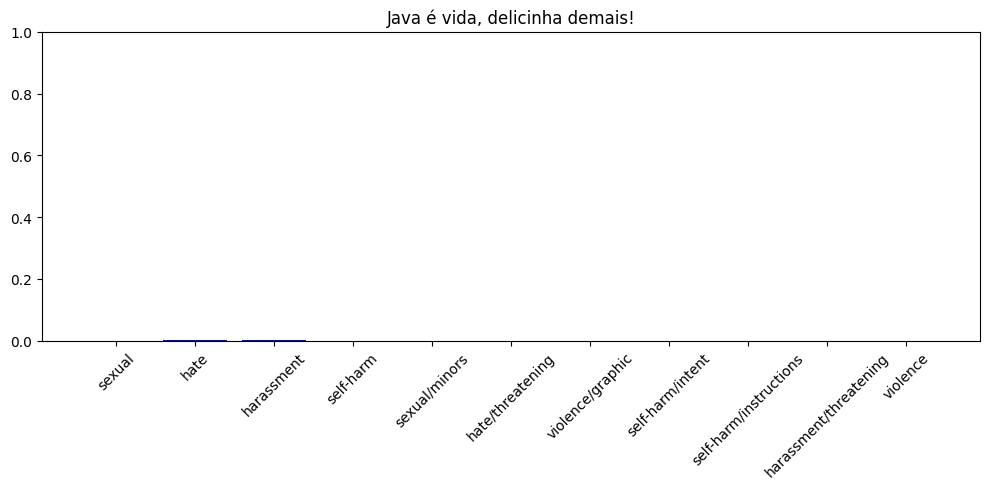

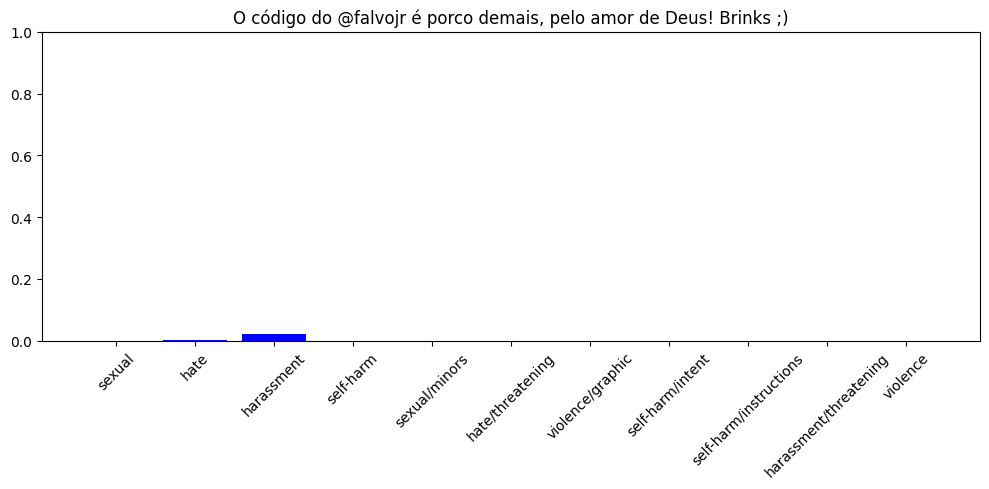

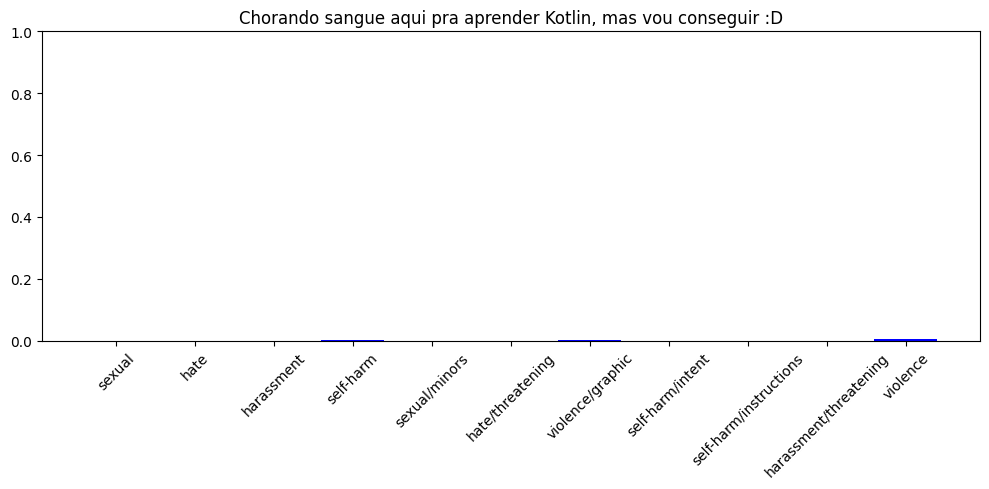

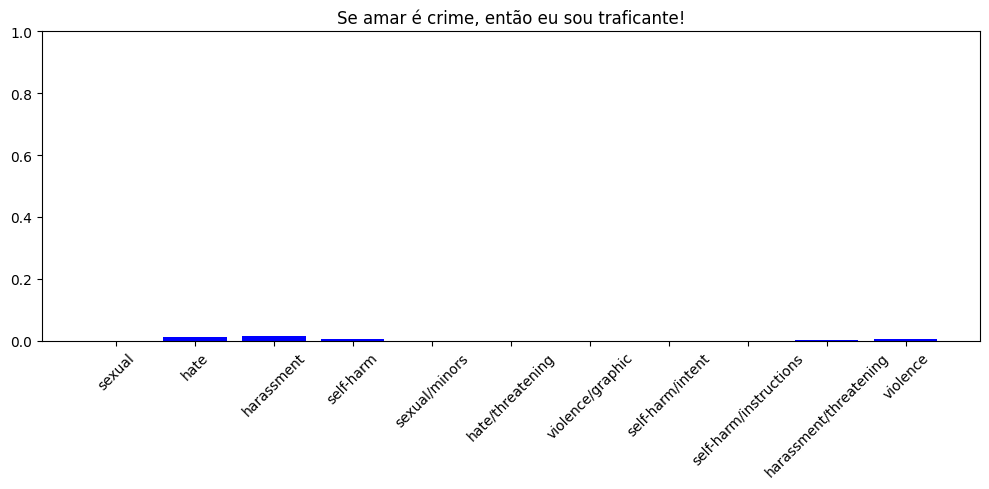

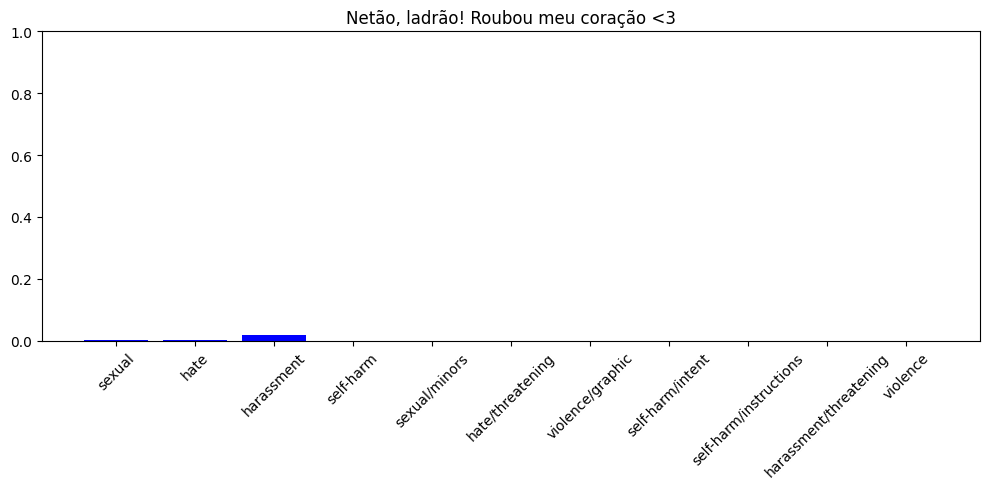

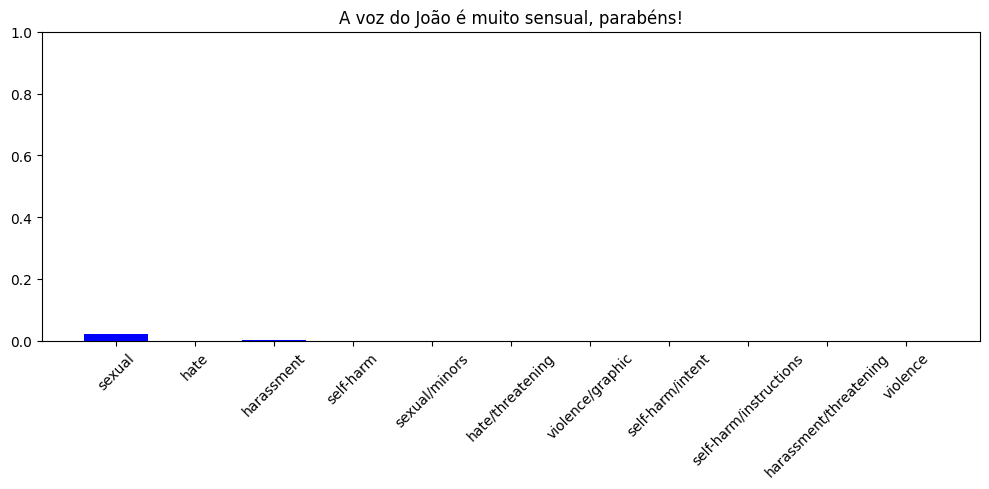

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Criando um gráfico de barras para cada mensagem
for i, tweet in enumerate(moderated_tweets):
    categories = tweet['moderation']['categories']
    flagged = tweet['moderation']['flagged']

    plt.figure(figsize=(10, 5))
    bars = plt.bar(categories.keys(), categories.values(), color='red' if flagged else 'blue')

    # Adicionando título e ajustando o layout
    plt.title(tweet["text"])
    plt.xticks(rotation=45)
    plt.ylim(0, 1)  # Fixando o valor máximo em 1
    plt.tight_layout()

    # Exibindo o gráfico
    plt.show()
